In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [3]:
df = pd.concat([X, y], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Check the null values
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

## Data Cleaning

In [7]:
# Remove the duplicate values
df = df.drop_duplicates()
# Check the is any duplicates in the dataset
print(df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [8]:
df.shape

(48813, 15)

In [9]:
# Check the unique values
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [10]:
for column in df.columns:
    df_unique = df[column].unique()
    print()
    print(df_unique)


[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

[ 77516  83311 215646 ... 173449  89686 350977]

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

['Not-in-fam

In [11]:
# Replace "?" with NaN
df.replace('?',pd.NA, inplace=True)

In [12]:
# Remove NaN values
df.dropna(inplace=True)
for column in df.columns:
    df_unique = df[column].unique()
    print()
    print(df_unique)


[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

[ 77516  83311 215646 ... 173449  89686 350977]

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

['Not-in-family' 'Husband' 'Wife' 'Own-chil

In [13]:
df.shape

(45194, 15)

## Remove Outliers

In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


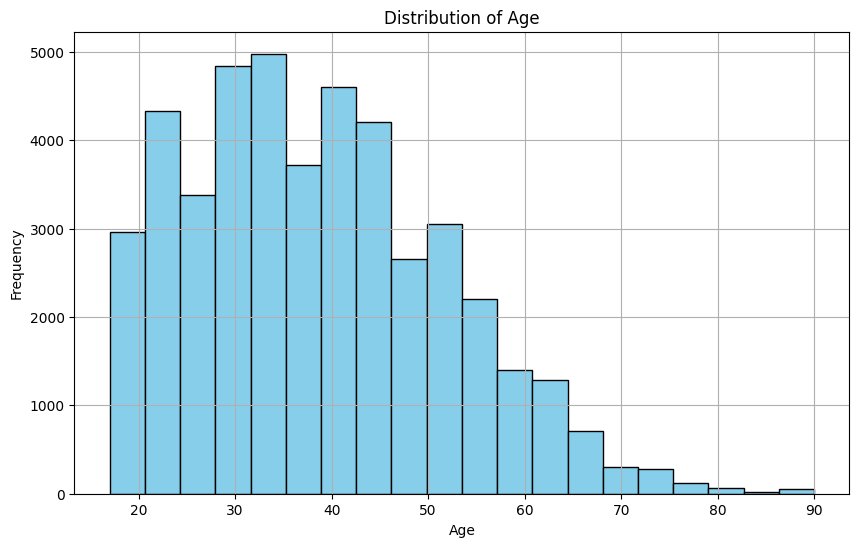

In [15]:
# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

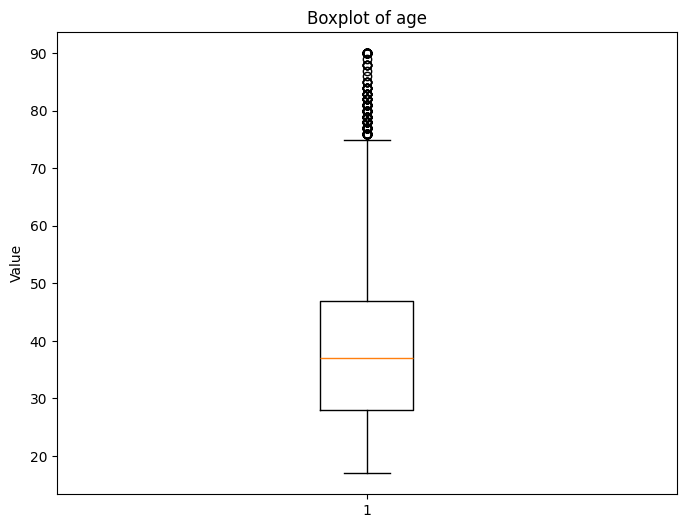

In [16]:
# Plot the Age
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['age'])
plt.title(f'Boxplot of age')
plt.ylabel('Value')
plt.show()

In [17]:
# Handle the outlier of age
# Calculate quartiles
Q1 = np.percentile(df['age'], 25)
Q3 = np.percentile(df['age'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)

Number of outliers: 268


In [18]:
# Apply Winsorization to replace outliers
df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

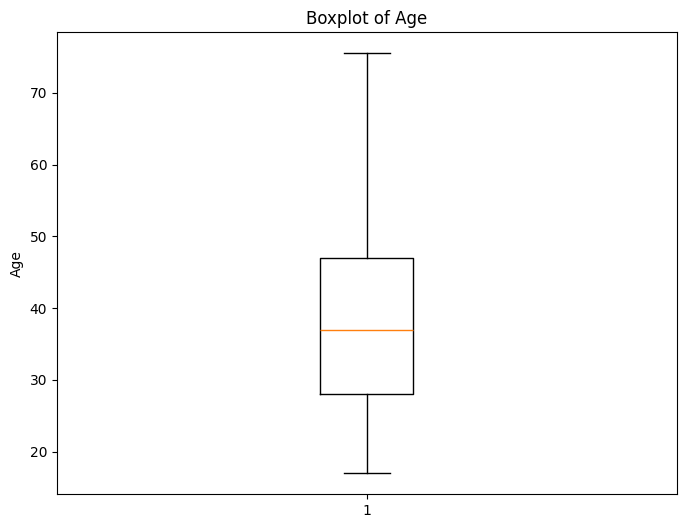

In [19]:
# Plot after the replace outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

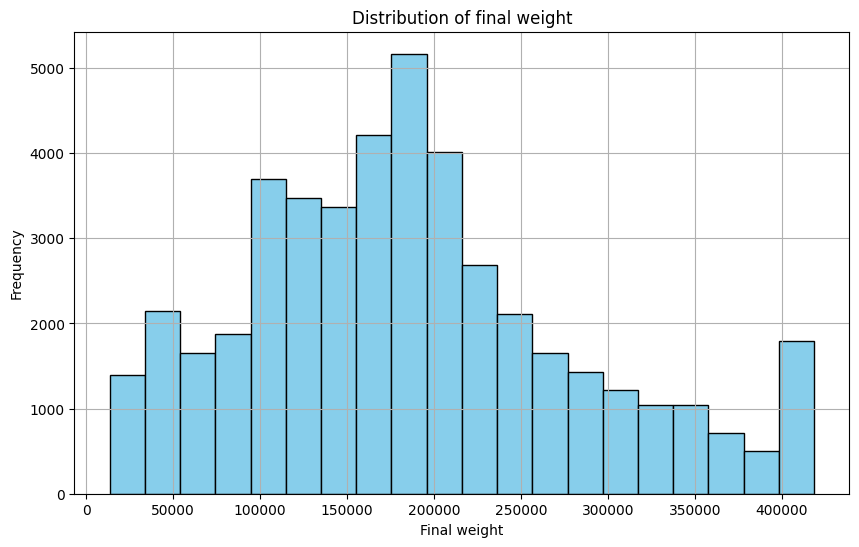

In [41]:
# Histogram of final weight
plt.figure(figsize=(10, 6))
plt.hist(df['fnlwgt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of final weight')
plt.xlabel('Final weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

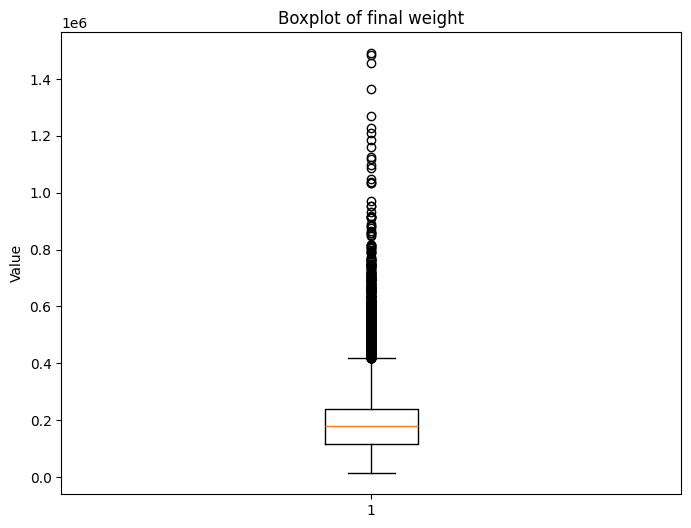

In [21]:
# Plot the final weight
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['fnlwgt'])
plt.title(f'Boxplot of final weight')
plt.ylabel('Value')
plt.show()

In [22]:
# Handle the outlier of final weight
# Calculate quartiles
Q1 = np.percentile(df['fnlwgt'], 25)
Q3 = np.percentile(df['fnlwgt'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)

Number of outliers: 1332


In [23]:
# Apply Winsorization to replace outliers
df['fnlwgt'] = np.where(df['fnlwgt'] < lower_bound, lower_bound, df['fnlwgt'])
df['fnlwgt'] = np.where(df['fnlwgt'] > upper_bound, upper_bound, df['fnlwgt'])

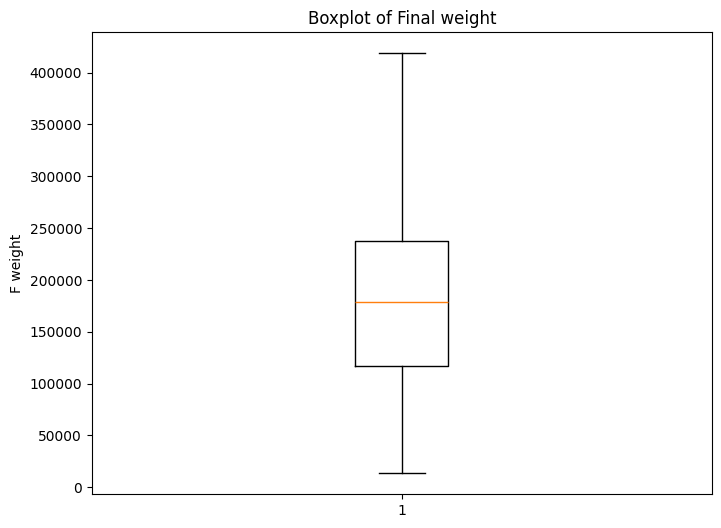

In [24]:
# Plot after the replace outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['fnlwgt'])
plt.title('Boxplot of Final weight')
plt.ylabel('F weight')
plt.show()

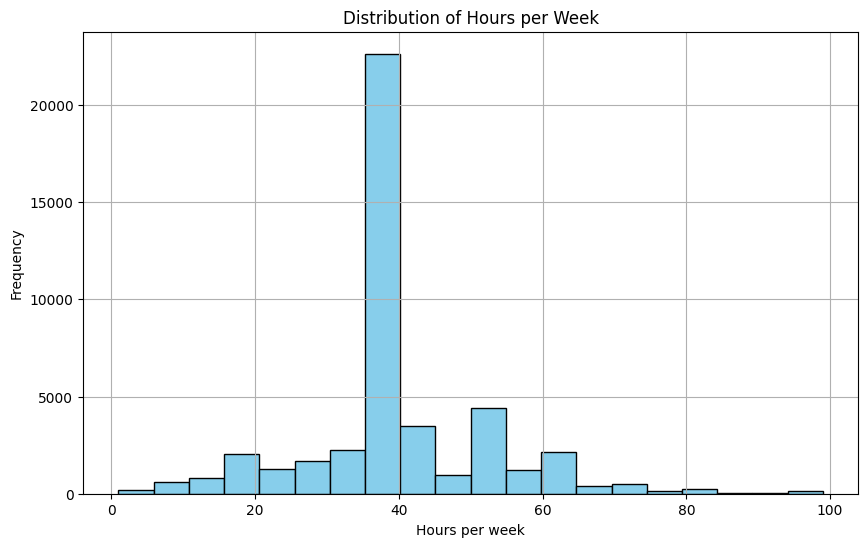

In [25]:
# Histogram of Hours per week
plt.figure(figsize=(10, 6))
plt.hist(df['hours-per-week'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

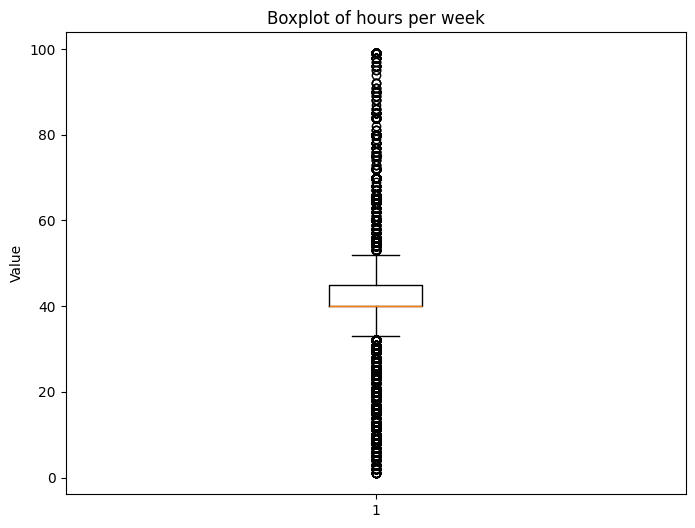

In [26]:
# Plot the Hours per week
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['hours-per-week'])
plt.title(f'Boxplot of hours per week')
plt.ylabel('Value')
plt.show()

In [27]:
# Apply Winsorization to replace outliers
lower_bound = 0
upper_bound = 90
df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound, lower_bound, df['hours-per-week'])
df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound, upper_bound, df['hours-per-week'])

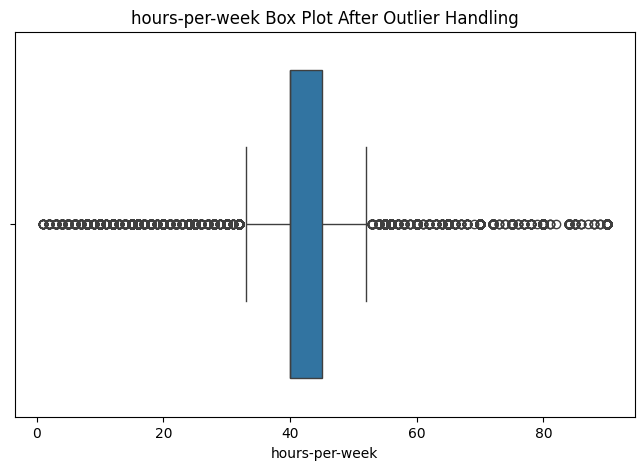

In [28]:
# Create a box plot for the "Hours Per Week" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["hours-per-week"])
plt.title("hours-per-week Box Plot After Outlier Handling")
plt.show()

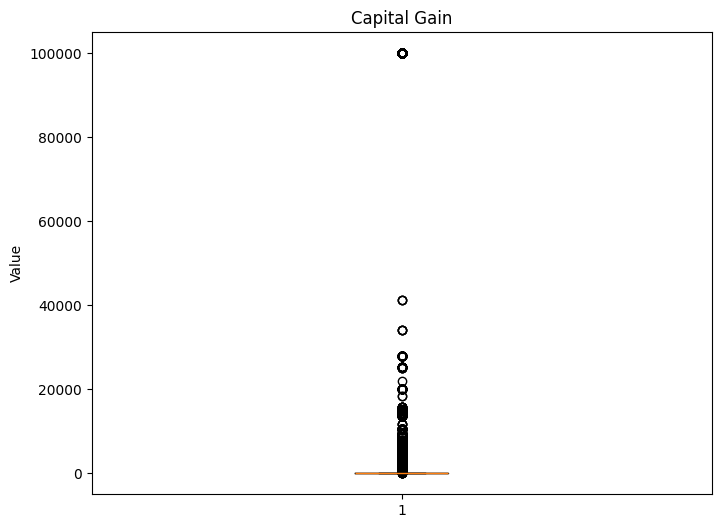

In [29]:
# Plot the the "capital-Gain"
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['capital-gain'])
plt.title(f'Capital Gain')
plt.ylabel('Value')
plt.show()

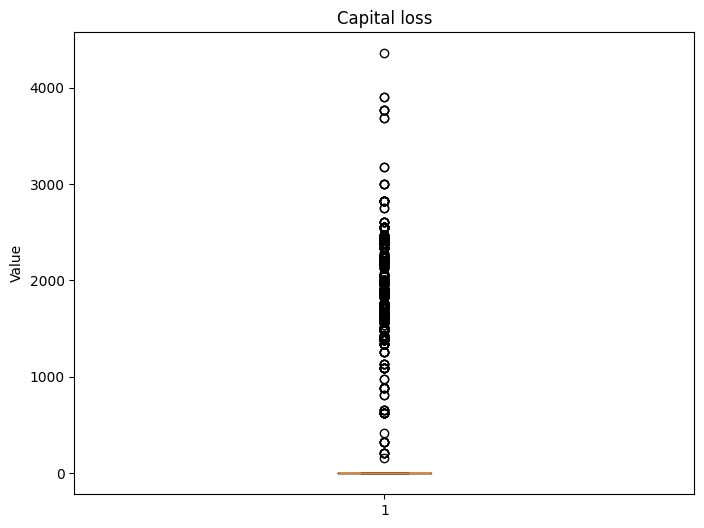

In [30]:
# Plot the the "capital-loss"
plt.figure(figsize=(8, 6)) 
plt.boxplot(x=df['capital-loss'])
plt.title(f'Capital loss')
plt.ylabel('Value')
plt.show()

In [31]:
# Remove the "." in income 
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'},inplace=True)

In [32]:
# Prove the there is not '.' in income Value
for column in df.columns:
    income_value = df['income']
    print()
    print(income_value)


0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45194, dtype: object

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45194, dtype: object

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45194, dtype: object

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45194, dtype: object

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50

## Data Visualization

#### Income above and bellow 50K

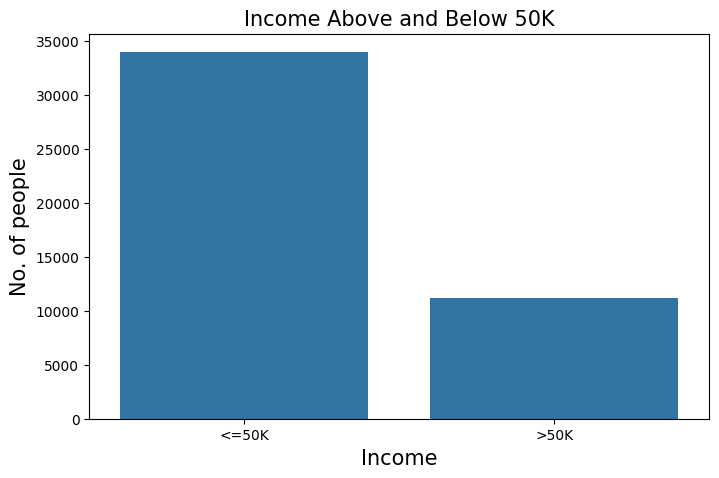

In [33]:
fig,axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data = df, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

#### Visualized occupation and income count

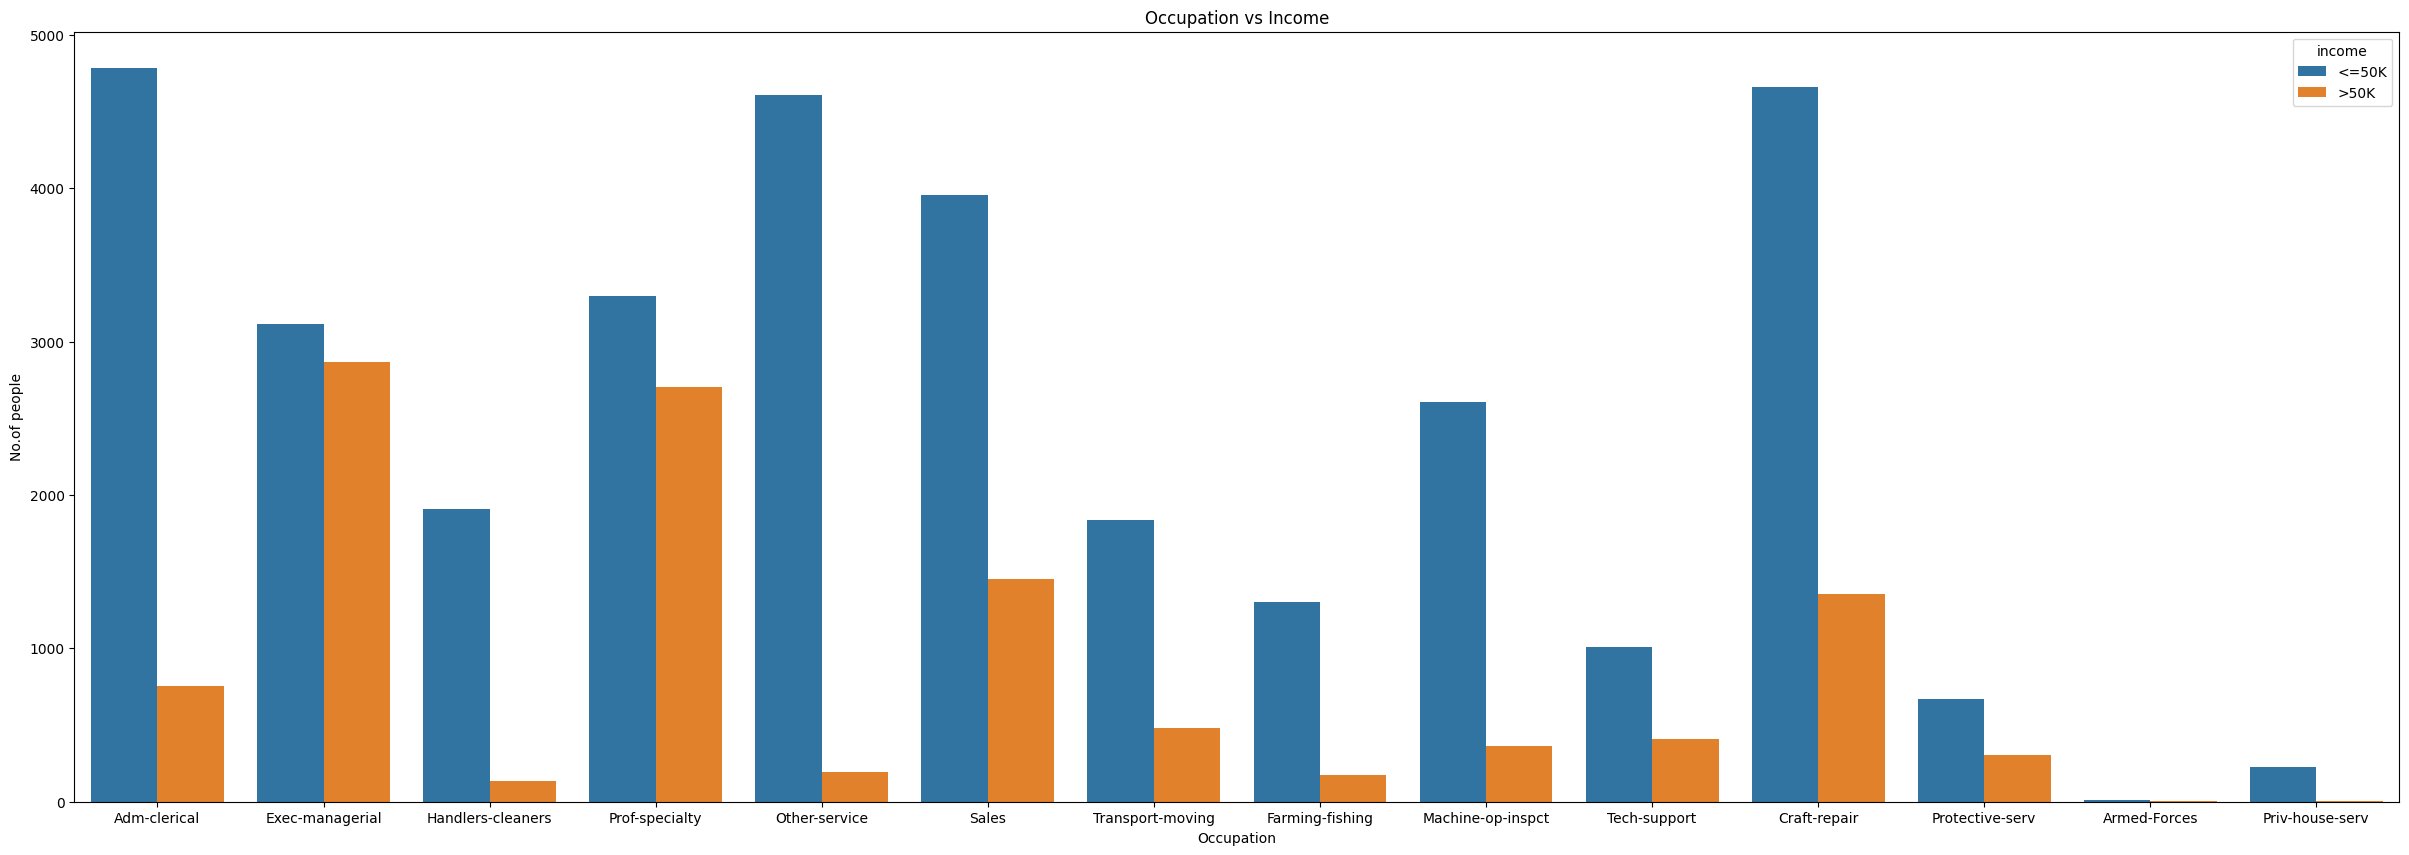

In [37]:
fig, axes = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df,x='occupation',hue='income')
plt.title('Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('No.of people')
plt.show()

#### Sex vs Income Count

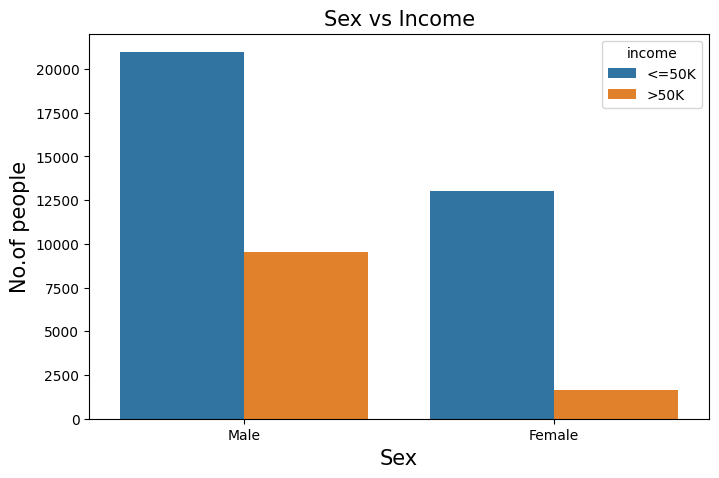

In [38]:
fig, axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data=df,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

In [42]:
# Removing duplicates
df = df.drop_duplicates()

# Finding duplicate values in the dataset
print(df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


## ENCODING CATEGORICAL VALUES

In [43]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [44]:
# Label Encoding
l_encoder = LabelEncoder()

encoding_columns = ['workclass', 'education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for col in encoding_columns:
    df[col] = l_encoder.fit_transform(df[col])
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516.0,9,12,4,0,1,4,1,2174,0,40,38,0
1,50.0,4,83311.0,9,12,2,3,0,4,1,0,0,13,38,0
2,38.0,2,215646.0,11,8,0,5,1,4,1,0,0,40,38,0
3,53.0,2,234721.0,1,6,2,5,0,2,1,0,0,40,38,0
4,28.0,2,338409.0,9,12,2,9,5,2,0,0,0,40,4,0
5,37.0,2,284582.0,12,13,2,3,5,4,0,0,0,40,38,0
6,49.0,2,160187.0,6,4,3,7,1,2,0,0,0,16,22,0
7,52.0,4,209642.0,11,8,2,3,0,4,1,0,0,45,38,1
8,31.0,2,45781.0,12,13,4,9,1,4,0,14084,0,50,38,1
9,42.0,2,159449.0,9,12,2,3,0,4,1,5178,0,40,38,1


In [45]:
X = df.drop(['income'], axis=1) # Features
y = df['income'] #Target variable 

In [46]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

<Axes: title={'center': 'Correlation between different features of the dataset'}>

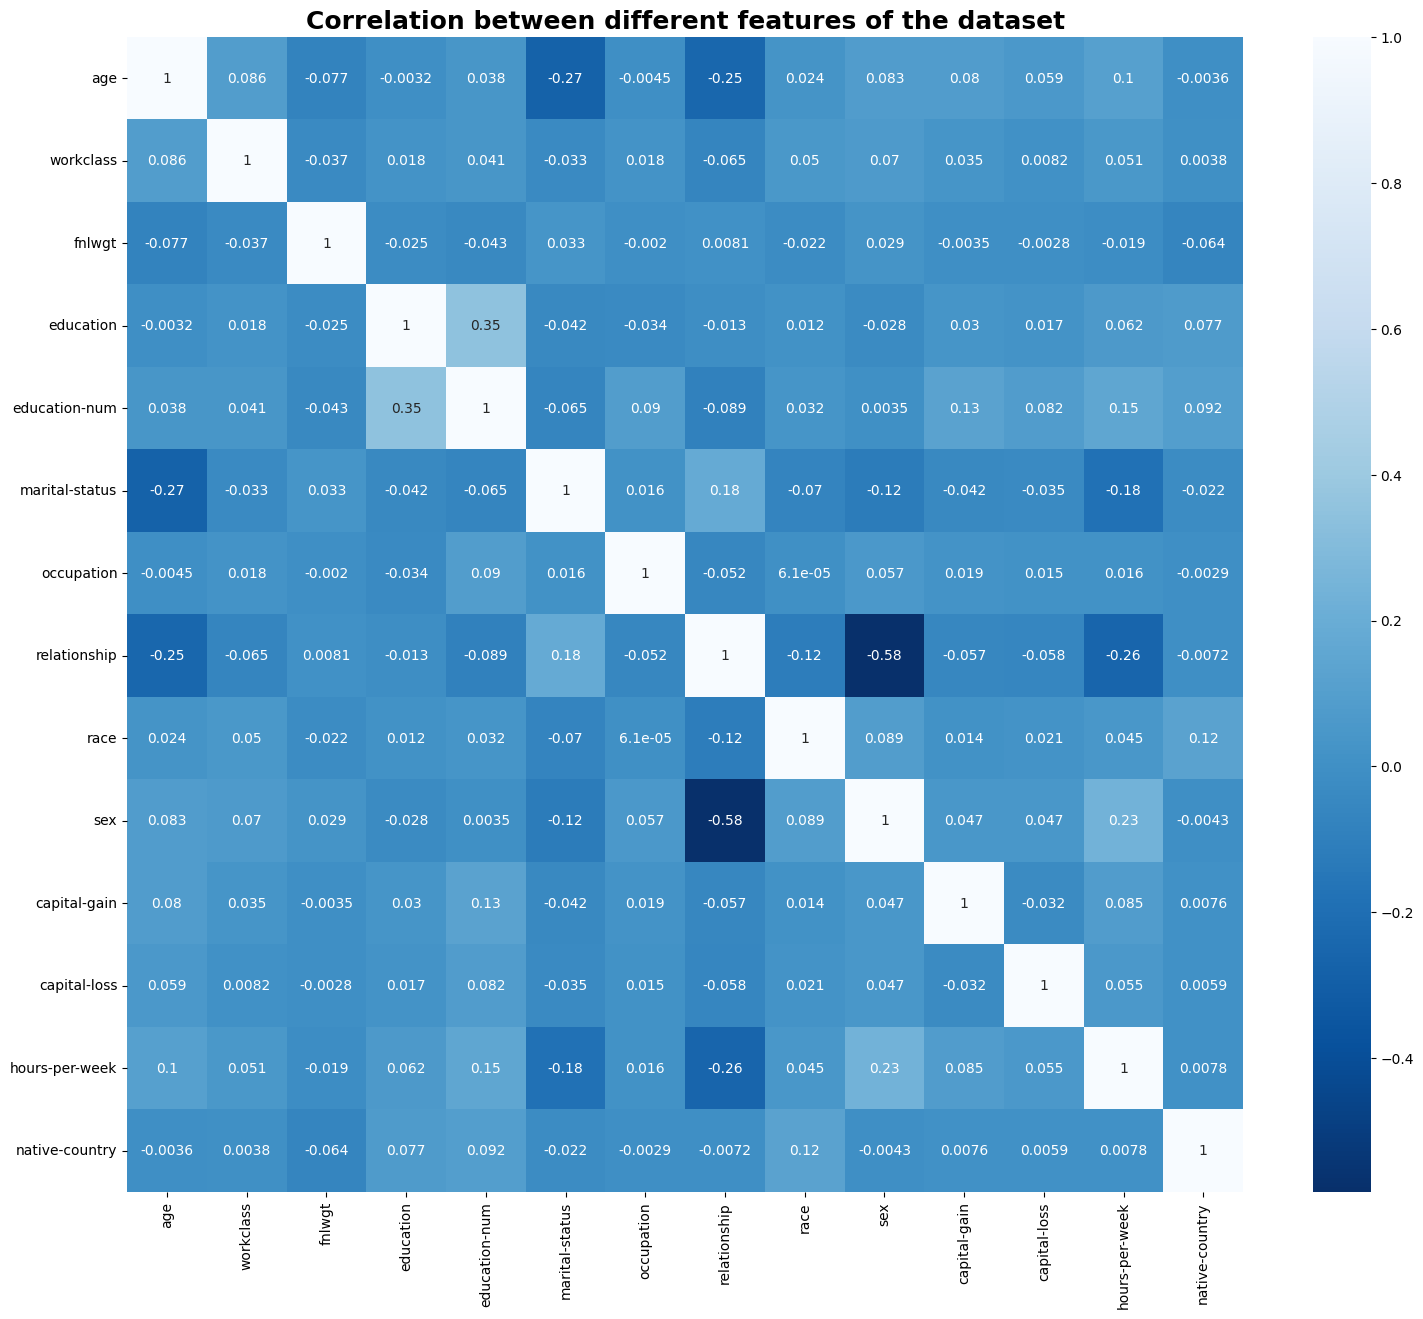

In [47]:
plt.figure(figsize = (18,15))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(X.corr(), cmap = 'Blues_r', annot = True)

In [48]:
# Comparing the correlation to the income
correlation_matrix = df.corr()['income'].sort_values(ascending=False)

print(correlation_matrix)

income            1.000000
education-num     0.332981
age               0.238980
hours-per-week    0.229285
capital-gain      0.221106
sex               0.215740
capital-loss      0.148709
education         0.081174
race              0.070817
occupation        0.049751
native-country    0.019844
workclass         0.015657
fnlwgt           -0.005936
marital-status   -0.192458
relationship     -0.253294
Name: income, dtype: float64


In [49]:
directory = 'Income-Prediction'

if not os.path.exists(directory):
    os.makedirs(directory)

csv_path = os.path.join(directory, 'Preprocessed_dataset.csv')

df.to_csv(csv_path, index=False)
print(f'CSV file saved: {csv_path}')

CSV file saved: Income-Prediction\Preprocessed_dataset.csv
